In [5]:
import pandas as pd  
from sqlalchemy import create_engine  
import pymysql  

# Load the dataset  
df = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\chaduvu stuff\superstore_excel.csv", encoding='utf-8')  
df['Order Date'] = pd.to_datetime(df['Order Date'])  

# Set up MySQL connection (replace with your credentials)  
user = 'root'  
password = 'mysql'  # Replace with your actual password if any
host = 'localhost'  
database = 'sales_db'  

# Create the connection engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

# Write the DataFrame to MySQL (replace table if it exists)  
df.to_sql('online_sales', con=engine, if_exists='replace', index=False, method='multi')  

print('Data loaded into MySQL table online_sales')


Data loaded into MySQL table online_sales


In [10]:
# Define the SQL query for MySQL  
sql_query = '''  
SELECT   
    YEAR(`Order Date`) AS year,  
    MONTH(`Order Date`) AS month,  
    SUM(Sales) AS total_revenue,  
    COUNT(DISTINCT `Order ID`) AS order_volume  
FROM online_sales  
GROUP BY year, month  
ORDER BY year, month;  
'''  
  
# Execute the query and load results into a DataFrame  
trend_df = pd.read_sql_query(sql_query, engine)  
print(trend_df.head())  

   year  month  total_revenue  order_volume
0  2023      4      311803.52           132
1  2023      5      555036.79           215
2  2023      6      544499.85           207
3  2023      7      592283.63           207
4  2023      8      595341.42           234


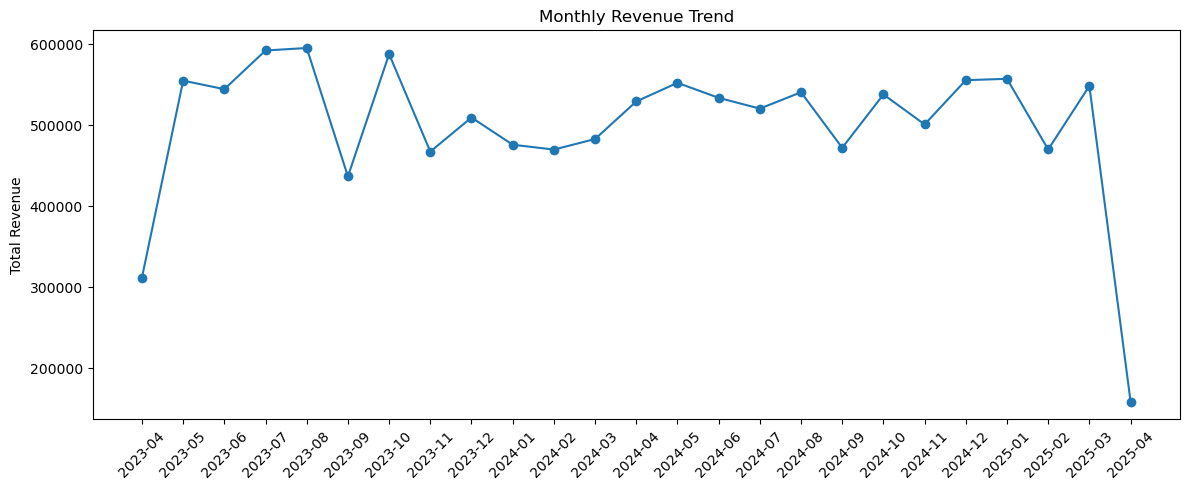

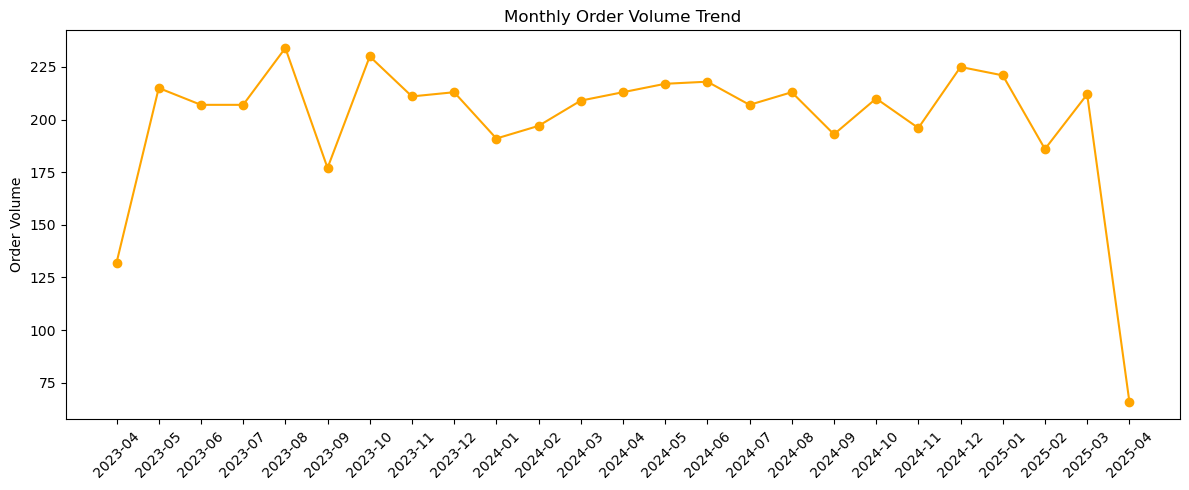

In [11]:
import matplotlib.pyplot as plt  
  
# Plot monthly revenue trend  
plt.figure(figsize=(12,5))  
plt.plot(trend_df['year'].astype(str) + '-' + trend_df['month'].astype(str).str.zfill(2), trend_df['total_revenue'], marker='o')  
plt.xticks(rotation=45)  
plt.ylabel('Total Revenue')  
plt.title('Monthly Revenue Trend')  
plt.tight_layout()  
plt.show()  
  
# Plot monthly order volume trend  
plt.figure(figsize=(12,5))  
plt.plot(trend_df['year'].astype(str) + '-' + trend_df['month'].astype(str).str.zfill(2), trend_df['order_volume'], marker='o', color='orange')  
plt.xticks(rotation=45)  
plt.ylabel('Order Volume')  
plt.title('Monthly Order Volume Trend')  
plt.tight_layout()  
plt.show()  